In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("drug200.csv")

In [4]:
df.head(15)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [8]:
df.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [13]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [18]:
sex= df['Sex'].value_counts()
BP = df['BP'].value_counts()
Cholesterol= df['Cholesterol'].value_counts()
Drug= df['Drug'].value_counts()

In [19]:
print(sex,"\n", BP,"\n",Cholesterol,"\n",Drug )

M    104
F     96
Name: Sex, dtype: int64 
 HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64 
 HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64 
 drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [21]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [22]:
y=df['Drug']

In [25]:
X=df.drop(columns=['Drug'])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

In [62]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
114,20,0,2,1,9.281
187,47,1,0,0,10.403
76,36,0,0,0,11.198
122,34,1,2,0,22.456
142,60,1,0,1,8.621
...,...,...,...,...,...
132,49,1,1,1,13.598
33,65,0,0,1,31.876
109,23,1,2,0,16.850
139,69,0,2,0,10.065


In [63]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtc=DecisionTreeClassifier()
cv=GridSearchCV(dtc,param_grid=parameter,cv=5 ,scoring='accuracy')

In [65]:
cv.fit(X_train,y_train)

C:\Users\DELL\.conda\envs\env312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\.conda\envs\env312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\.conda\envs\env312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\.conda\envs\env312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [66]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [67]:
y_pred=cv.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       0.94      1.00      0.97        16
           4       1.00      0.97      0.98        30

    accuracy                           0.97        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.97      0.97      0.97        60



In [37]:
treemodel=DecisionTreeClassifier(max_depth=6)
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

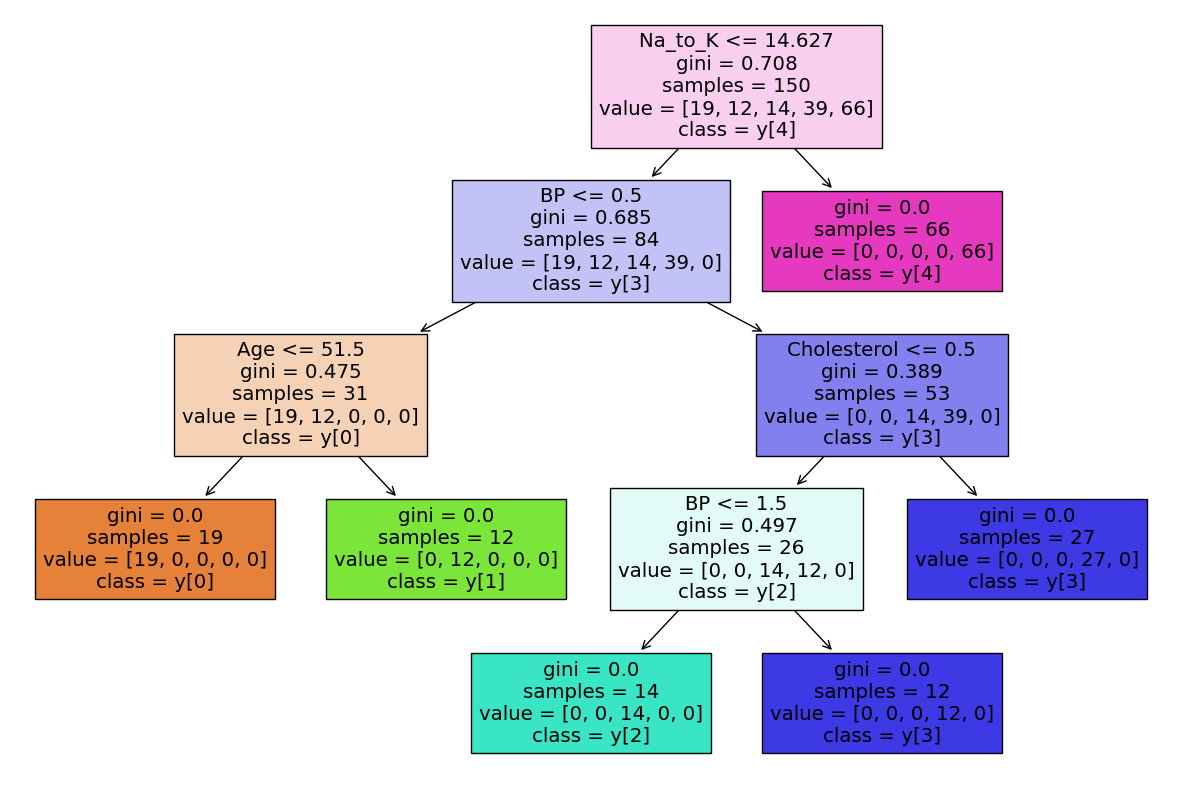

In [40]:
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True, feature_names=X.columns, class_names=True)
plt.show()

## User Predicction

In [51]:
# For example, asking the user for inputs interactively
age = float(input("Enter age: "))
gender = input("Enter gender (M/F): ")
bp = input("Enter blood pressure (LOW, NORMAL, HIGH): ")
cholesterol = input("Enter cholesterol (NORMAL, HIGH): ")
Na_to_k = float(input("Enter Na_to_K: "))

gender_encoded = 0 if gender == 'M' else 1
bp_encoded = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}[bp]
cholesterol_encoded = {'NORMAL': 0, 'HIGH': 1}[cholesterol]

# Creating the input array
user_input = np.array([[age, gender_encoded, bp_encoded, cholesterol_encoded, Na_to_k]])

# Predicting the class
predicted_class = treemodel.predict(user_input)[0]  # Extract the scalar value

# Mapping the label encoded classes to drug names
drug_mapping = {0: 'drugY', 1: 'drugX', 2: 'drugA', 3: 'drugC', 4: 'drugB'}

# Outputting the predicted class and the corresponding drug name
predicted_drug = drug_mapping[predicted_class]
print(f"The predicted class is: {predicted_class}")
print(f"The predicted drug is: {predicted_drug}")

Enter age: 65
Enter gender (M/F): F
Enter blood pressure (LOW, NORMAL, HIGH): LOW
Enter cholesterol (NORMAL, HIGH): NORMAL
Enter Na_to_K: 10.7
The predicted class is: 1
The predicted drug is: drugX


C:\Users\DELL\.conda\envs\env312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Assuming your model 'dtc' is already fitted with training data
# Let's say your features are ['age', 'gender', 'bp', 'cholesterol']

# Step 1: Collect user input
# For example, asking the user for inputs interactively
age = float(input("Enter age: "))
gender = input("Enter gender (M/F): ")
bp = input("Enter blood pressure (LOW, NORMAL, HIGH): ")
cholesterol = input("Enter cholesterol (NORMAL, HIGH): ")
Na_to_k = float(input("Enter Na_to_K: "))
# Step 2: Encode categorical variables (assuming label encoding was used during training)
# Note: You'll need to encode these exactly as you did during training
# Assuming the following label encoding:
# gender: M = 0, F = 1
# bp: LOW = 0, NORMAL = 1, HIGH = 2
# cholesterol: NORMAL = 0, HIGH = 1

gender_encoded = 0 if gender == 'M' else 1
bp_encoded = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}[bp]
cholesterol_encoded = {'NORMAL': 0, 'HIGH': 1}[cholesterol]

# Step 3: Create the input array for the prediction
user_input = np.array([[age, gender_encoded, bp_encoded, cholesterol_encoded]])

# Step 4: Predict the class using the trained model
predicted_class = dtc.predict(user_input)

# Step 5: Output the predicted class
print(f"The predicted class is: {predicted_class[0]}")
